# Projek Pribadi


## Data Cleaning and Preparation using Pandas

### Inisialisasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Path ke file dalam Google Drive
file_path = "/content/drive/My Drive/College/SMS3/BIGDATA/PROJEK/irs_990_2020_v3 original.csv"

# Membaca file CSV dengan penanganan error dan delimiter yang berbeda
try:
    df = pd.read_csv(file_path, sep=',', on_bad_lines='skip', engine='python')  # Coba dengan engine='python' dan skip baris error
except pd.errors.ParserError:
    df = pd.read_csv(file_path, sep=';', on_bad_lines='skip', engine='python')  # Jika koma gagal, coba dengan titik koma
    # atau delimiter lainnya yang sesuai dengan file Anda

# Melihat beberapa baris awal dataset
print(df.head())

# Informasi dataset
print(df.info())

  return_type          ein business_name_control  \
0       990EZ  261382062.0                  LEAR   
1       990EZ  232655257.0                  NATL   
2       990EZ  461619725.0                  MADI   
3       990EZ  264326267.0                  FAYE   
4       990EZ  464114716.0                  COLO   

                     business_name_ln1 business_name_ln2  zip_code  \
0                LEARNING INSIGHTS INC               NaN   63052.0   
1   NATL ASSOC OF WOMEN BUSINESS OWNER               NaN   19034.0   
2  MADISON ICE HOCKEY BOOSTER CLUB INC               NaN    7940.0   
3       FAYETTEVILLE POLICE FOUNDATION               NaN   28301.0   
4                 Colors of Connection               NaN   98155.0   

                         address             city state principal_officer  \
0                     PO BOX 353         Imperial    MO               NaN   
1           1231 HIGHLAND AVENUE  FORT WASHINGTON    PA               NaN   
2  C/O JEN GERO- 191 CENTRAL AVE   

### Check Missing Data

In [ ]:
print(df.isnull().sum())


return_type                                                                                                      2
ein                                                                                                              2
business_name_control                                                                                            2
business_name_ln1                                                                                                2
business_name_ln2                                                                                           216203
                                                                                                             ...  
public_support_pct_cy                                                                                       198063
public_support_pct_py                                                                                       225748
public_org_170                                                                  

### Membersihkan Data

- Mengisi Data Kosong

In [ ]:
# Mengisi missing values numerik
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values kategorikal
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-7-4bbe10772bea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-4bbe10772bea>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

- Membersihkan Duplikasi

In [ ]:
# Mendeteksi duplikasi
duplicate_rows = df[df.duplicated()]
print("Jumlah duplikasi:", len(duplicate_rows))

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

Jumlah duplikasi: 1188


### Check setelah dibersihkan

In [ ]:
print(df.isnull().sum())

return_type                                                                                                 0
ein                                                                                                         0
business_name_control                                                                                       0
business_name_ln1                                                                                           0
business_name_ln2                                                                                           0
                                                                                                           ..
public_support_pct_cy                                                                                       0
public_support_pct_py                                                                                       0
public_org_170                                                                                              0
public_sup

In [ ]:
# Menghapus duplikasi dan memperbarui DataFrame
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", len(df))



Jumlah data setelah menghapus duplikasi: 267157


In [ ]:
# Melihat beberapa baris awal dataset
print(df.head())

  return_type          ein business_name_control  \
0       990EZ  261382062.0                  LEAR   
1       990EZ  232655257.0                  NATL   
2       990EZ  461619725.0                  MADI   
3       990EZ  264326267.0                  FAYE   
4       990EZ  464114716.0                  COLO   

                     business_name_ln1 business_name_ln2  zip_code  \
0                LEARNING INSIGHTS INC        FOUNDATION   63052.0   
1   NATL ASSOC OF WOMEN BUSINESS OWNER        FOUNDATION   19034.0   
2  MADISON ICE HOCKEY BOOSTER CLUB INC        FOUNDATION    7940.0   
3       FAYETTEVILLE POLICE FOUNDATION        FOUNDATION   28301.0   
4                 Colors of Connection        FOUNDATION   98155.0   

                         address             city state   principal_officer  \
0                     PO BOX 353         Imperial    MO  JOSEPH A BUDZYNSKI   
1           1231 HIGHLAND AVENUE  FORT WASHINGTON    PA  JOSEPH A BUDZYNSKI   
2  C/O JEN GERO- 191 CENTRAL 

- Normalisasi Kolom Numerik

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])



- Konversi Kolom Kategorikal ke String

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].astype(str)

- Penerapan LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


- Mengganti Nilai NaN dengan String Khusus

In [ ]:
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


- Encoding Ulang Kolom Kategorikal

In [ ]:
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

- Memeriksa Nilai Unik Tiap Kolom Kategorikal

In [ ]:
for col in cat_cols:
    print(f"Kolom: {col}, Unique Values: {df[col].unique()}")

Kolom: return_type, Unique Values: [1 0 2]
Kolom: business_name_control, Unique Values: [14276 16975 15238 ... 12208 11710 26683]
Kolom: business_name_ln1, Unique Values: [117814 143708 126104 ...  95221  85639 118779]
Kolom: business_name_ln2, Unique Values: [15434 11306 17028 ... 26192  7822 18689]
Kolom: address, Unique Values: [179598  21488 164102 ... 101733 144911 166893]
Kolom: city, Unique Values: [ 8615  6054 10591 ...  8101 13925  4738]
Kolom: state, Unique Values: [26 40 33 29 51  5 25  6 16  3 53  1 27 21 50  7 14 46 36 20 37 10 24 11
 48 52 22 54 45 39 44 43 13 17  9 18 38 19  4 31 42  8 34 35 23 32 15  0
 47 28 30 41 49  2 12]
Kolom: principal_officer, Unique Values: [22587 32217  4728 ...  7592 44140 22169]
Kolom: website, Unique Values: [ 4047 25311 17541 ...  8597  2990 24525]
Kolom: website_ez, Unique Values: [ 8095 28570 22070 ... 15457 33325 52662]
Kolom: org_type_other_description, Unique Values: [328 584 544 ...  11   7 949]
Kolom: legal_domicile_state, Unique Val

### Export FIle

- Export File ke Drive

In [ ]:
# Menyimpan dataset yang sudah bersih ke file baru di Google Drive
output_path = "/content/drive/My Drive/College/SMS3/BIGDATA/PROJEK/cleaned_dataset_downloaded.csv"
df.to_csv(output_path, index=False)
print("Dataset telah disimpan sebagai 'cleaned_dataset_downloaded.csv'.")

- Melihat lokasi path di drive file tersimpan

In [ ]:
# Menampilkan lokasi file tersimpan
import os
print("Dataset disimpan di lokasi:", os.path.abspath(output_path))

Dataset disimpan di lokasi: /content/drive/My Drive/College/SMS3/BIGDATA/PROJEK/cleaned_dataset_downloaded.csv


## Data Visualization using Matplotlib and Seaborn

## Inisialisasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Path ke file dalam Google Drive
file_path = "/content/drive/My Drive/College/SMS3/BIGDATA/PROJEK/cleaned_dataset_downloaded.csv"
df = pd.read_csv(file_path)

print(df.head())

   return_type       ein  business_name_control  business_name_ln1  \
0            1  0.254419                  14276             117814   
1            1  0.225344                  16975             143708   
2            1  0.457091                  15238             126104   
3            1  0.257399                   8313              66589   
4            1  0.459616                   5244              49791   

   business_name_ln2  zip_code  address   city  state  principal_officer  ...  \
0              15434  0.000062   179598   8615     26              22587  ...   
1              15434  0.000018    21488   6054     40              22587  ...   
2              15434  0.000007   164102  10591     33              22587  ...   
3              15434  0.000028   112375   5819     29              22587  ...   
4              15434  0.000098   190952  17726     51              22587  ...   

   program_services_total  total_assets_eoy  total_assets_boy  \
0                0.000051  

- Diagram Korelasi

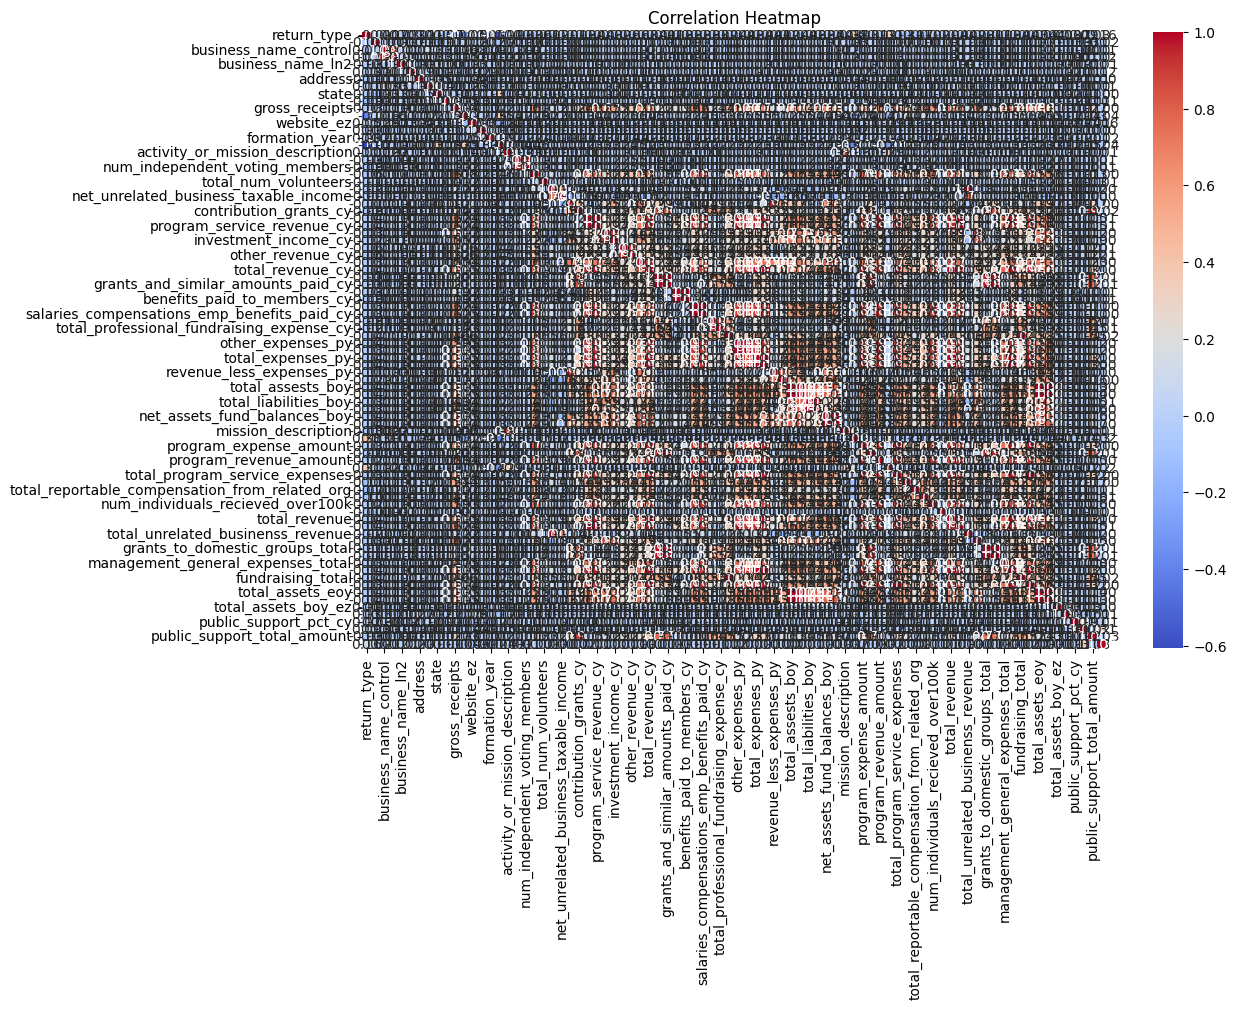

In [ ]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

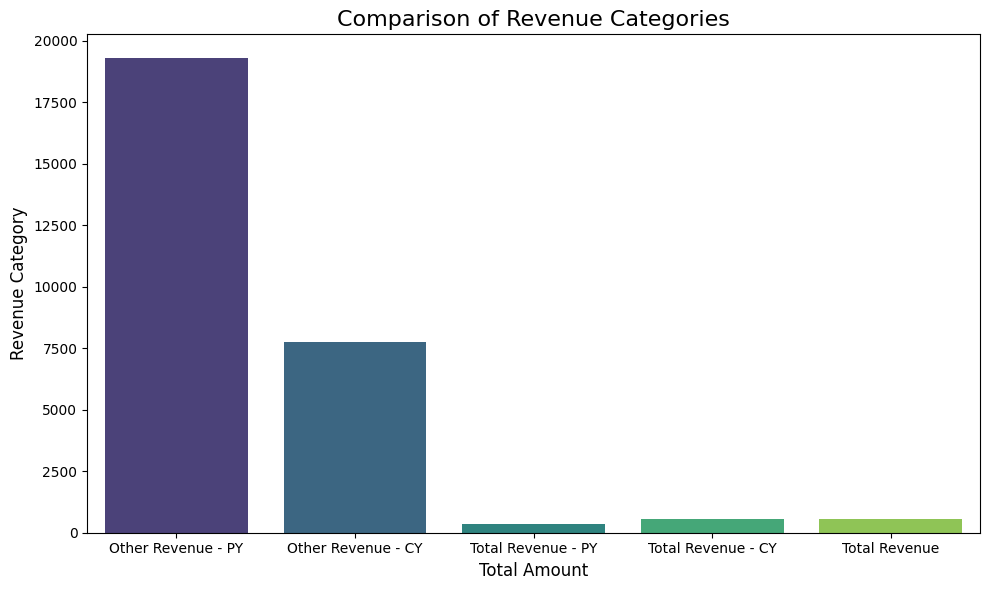

In [ ]:
# Memastikan kolom yang digunakan untuk analisis ada dalam dataset
required_columns = ['other_revenue_py', 'other_revenue_cy', 'total_revenue_py', 'total_revenue_cy', 'total_revenue']

if all(col in df.columns for col in required_columns):
    # Menyiapkan data untuk visualisasi
    revenue_data = pd.DataFrame({
        'Category': ['Other Revenue - PY', 'Other Revenue - CY', 'Total Revenue - PY', 'Total Revenue - CY', 'Total Revenue'],
        'Amount': [
            df['other_revenue_py'].sum(),
            df['other_revenue_cy'].sum(),
            df['total_revenue_py'].sum(),
            df['total_revenue_cy'].sum(),
            df['total_revenue'].sum()
        ]
    })

    # Membuat barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Amount', data=revenue_data, palette='viridis', hue='Category', dodge=False)

    # Menambahkan judul dan label
    plt.title('Comparison of Revenue Categories', fontsize=16)
    plt.xlabel('Total Amount', fontsize=12)
    plt.ylabel('Revenue Category', fontsize=12)
    plt.legend([],[], frameon=False)  # Menghapus legend yang tidak diperlukan

    # Menampilkan plot
    plt.tight_layout()
    plt.show()
else:
    print("Satu atau lebih kolom yang dibutuhkan tidak ditemukan dalam dataset.")

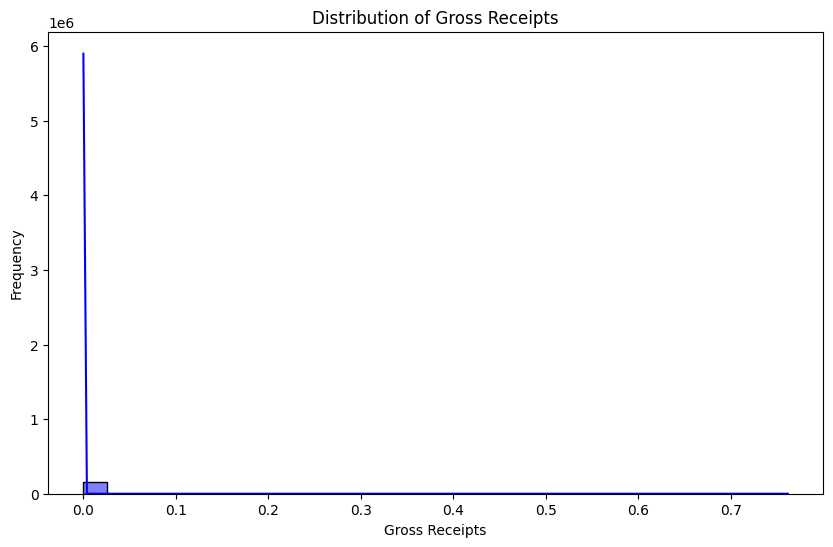

In [ ]:
# Memvisualisasikan distribusi `gross_receipts`
plt.figure(figsize=(10, 6))
sns.histplot(df['gross_receipts'], bins=30, kde=True, color='blue')
plt.title('Distribution of Gross Receipts')
plt.xlabel('Gross Receipts')
plt.ylabel('Frequency')
plt.show()


- Penyebaran Pendapatan Kotor

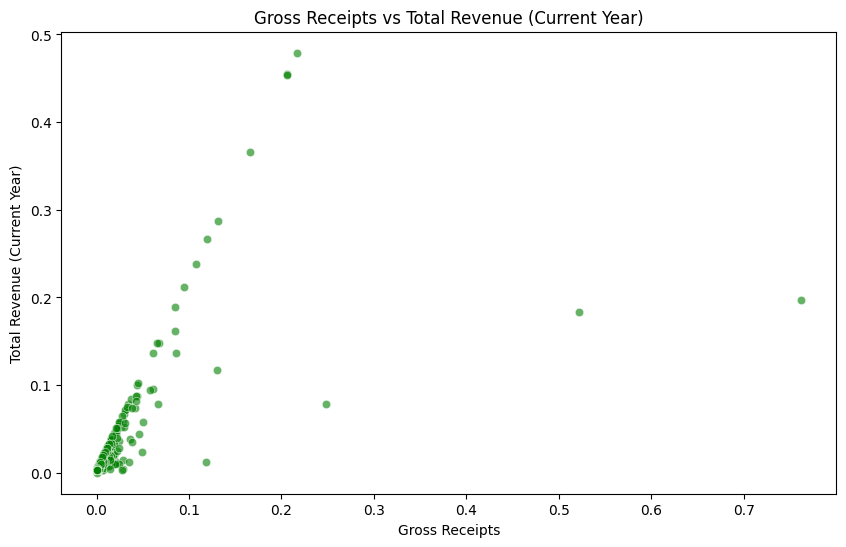

In [ ]:
# Grafik sebar: `gross_receipts` vs `total_revenue_cy`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross_receipts', y='total_revenue_cy', data=df, alpha=0.6, color='green')
plt.title('Gross Receipts vs Total Revenue (Current Year)')
plt.xlabel('Gross Receipts')
plt.ylabel('Total Revenue (Current Year)')
plt.show()

- Prediksi

Mean Squared Error: 5.5163515001093825e-06
R2 Score: 0.462583061822025


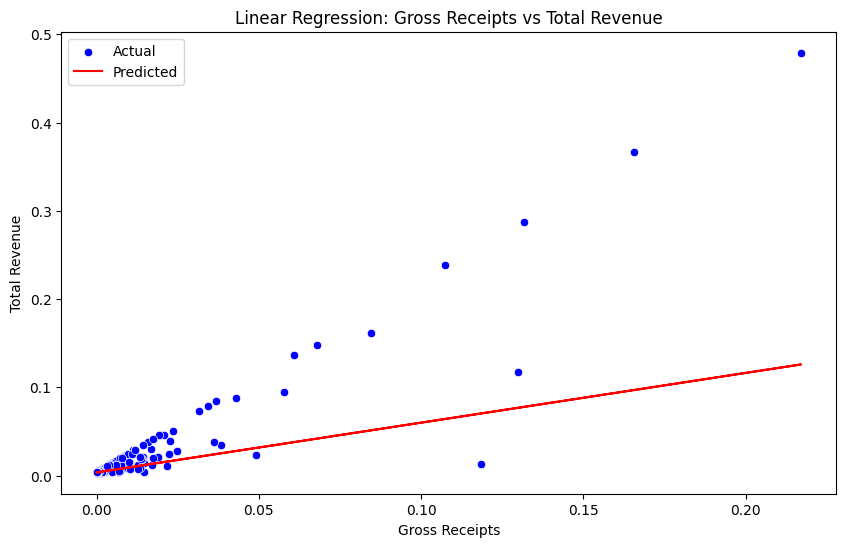

In [ ]:
# Model regresi linier: Memprediksi `total_revenue_cy` dari `gross_receipts`
X = df[['gross_receipts']].dropna()
y = df['total_revenue_cy'].dropna()

# Memastikan keselarasan antara X dan y
X, y = X.align(y, join='inner', axis=0)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Menampilkan garis regresi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['gross_receipts'], y=y_test, color='blue', label='Actual')
plt.plot(X_test['gross_receipts'], y_pred, color='red', label='Predicted')
plt.title('Regresi Linier: Gross Receipts vs Total Revenue')
plt.xlabel('Gross Receipts')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


## Machine Learning

## Inisialisasi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

In [ ]:
features = [
    'return_type', 'ein', 'business_name_control', 'business_name_ln1', 'business_name_ln2', 'zip_code',
    'address', 'city', 'state', 'principal_officer', 'gross_receipts', '501c3_org', 'website', 'website_ez',
    'org_type_corporation', 'org_type_corporation_ez', 'org_type_trust', 'org_type_trust_ez', 'org_type_association',
    'org_type_association_ez', 'org_type_other', 'org_type_other_ez', 'org_type_other_description', 'formation_year',
    'legal_domicile_state', 'activity_or_mission_description', 'num_governing_body_voting_members',
    'num_independent_voting_members', 'total_num_employees', 'total_num_volunteers', 'total_unrelated_business_income',
    'net_unrelated_business_taxable_income', 'contribution_grants_py', 'contribution_grants_cy', 'program_service_revenue_py',
    'program_service_revenue_cy', 'investment_income_py', 'investment_income_cy', 'other_revenue_py', 'other_revenue_cy',
    'total_revenue_py', 'total_revenue_cy', 'grants_and_similar_amounts_paid_py', 'grants_and_similar_amounts_paid_cy',
    'benefits_paid_to_members_py', 'benefits_paid_to_members_cy', 'salaries_compensations_emp_benefits_paid_py',
    'salaries_compensations_emp_benefits_paid_cy', 'total_professional_fundraising_expense_py',
    'total_professional_fundraising_expense_cy', 'total_fundrasing_expense_cy', 'other_expenses_py', 'other_expenses_cy',
    'total_expenses_py', 'total_expenses_cy', 'revenue_less_expenses_py', 'revenue_less_expenses_cy', 'total_assets_boy',
    'total_assets_eoy', 'total_liabilities_boy', 'total_liabilities_eoy', 'net_assets_fund_balances_boy',
    'net_assets_fund_balances_eoy', 'mission_description', 'significant_new_program_services',
    'significant_change_program_services', 'program_expense_amount', 'program_grant_amount', 'program_revenue_amount',
    'other_program_services_description', 'total_program_service_expenses', 'described_in_501c3', 'political_campaign_activity',
    'lobbying_activities', 'conservation_easement', 'collection_of_art', 'credit_counseling', 'school_operating', 'foreign_office',
    'foreign_activities', 'grants_assistance_foreign_orgs_over500k', 'grants_assistance_foreign_individuals_over500k',
    'professional_fundraising_over15k', 'fundraising_activities_over15k', 'gaming_activities_over15k', 'operating_hospital',
    'grants_domestic_orgs_over5k', 'grants_domestic_individuals_over5k', 'outstanding_loan', 'business_with_org_members',
    'business_with_org_members_family', 'business_with_org_officers', 'foreign_financial_account',
    'prohibited_tax_shelter_transaction', 'nondeductible_contributions_over100K', 'quid_pro_quo_contributions',
    'family_business_relationship', 'members_stockholders', 'local_chapters', 'conflict_of_interest_policy',
    'annual_conflicts_disclousre', 'enforced_compliancy', 'whistleblower_policy', 'document_retention_policy',
    'compensation_process_top_management', 'compensation_process_others', 'investment_in_joint_venture',
    'total_reportable_compensation_from_org', 'total_reportable_compensation_from_related_org',
    'total_other_compensations', 'num_individuals_recieved_over100k', 'compensation_over_150k', 'compensation_from_other_sources',
    'total_num_contractors_comp_over100k', 'total_revenue', 'total_related_exempt_income', 'total_unrelated_businenss_revenue',
    'total_exclusion_amount', 'grants_to_domestic_groups_total', 'grants_to_domestic_groups_program_services_total',
    'management_general_expenses_total', 'functional_expenses_total', 'fundraising_total', 'program_services_total',
    'total_assets_eoy', 'total_assets_boy', 'total_assets_boy_ez', 'total_assets_eoy_ez', 'public_support_pct_cy',
    'public_support_pct_py', 'public_org_170', 'public_support_total_amount'
]

# Pastikan kolom-kolom yang dipilih benar
X = df[features]
y = df['total_revenue']  # Mengasumsikan 'total_revenue' sebagai target yang ingin diprediksi

# Menangani nilai yang hilang (misalnya, mengisi atau menghapus)
X = X.fillna(0)  # Anda dapat menggunakan imputasi atau teknik lain sesuai kebutuhan

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Mengevaluasi model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Menampilkan pentingnya fitur (untuk memahami fitur mana yang lebih penting)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Fitur Teratas:")
for i in range(10):
    print(f"{features[indices[i]]}: {importances[indices[i]]}")

Mean Absolute Error: 3.7743415903190937e-06
Fitur Teratas:
total_revenue_cy: 0.32316749335005635
total_revenue: 0.27014240195236483
total_revenue_py: 0.04562027655343996
net_assets_fund_balances_boy: 0.027011984728787047
total_program_service_expenses: 0.026647493186247945
program_expense_amount: 0.026198469969415925
total_expenses_cy: 0.025766275269320273
other_expenses_py: 0.023900666492812545
functional_expenses_total: 0.022390182595119858
salaries_compensations_emp_benefits_paid_cy: 0.01971490844253793


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

### 2. Preprocessing Data

# Menyiapkan data
features = [
    'return_type', 'ein', 'business_name_control', 'business_name_ln1', 'business_name_ln2', 'zip_code',
    'address', 'city', 'state', 'principal_officer', 'gross_receipts', '501c3_org', 'website', 'website_ez',
    'org_type_corporation', 'org_type_corporation_ez', 'org_type_trust', 'org_type_trust_ez', 'org_type_association',
    'org_type_association_ez', 'org_type_other', 'org_type_other_ez', 'org_type_other_description', 'formation_year',
    'legal_domicile_state', 'activity_or_mission_description', 'num_governing_body_voting_members',
    'num_independent_voting_members', 'total_num_employees', 'total_num_volunteers', 'total_unrelated_business_income',
    'net_unrelated_business_taxable_income', 'contribution_grants_py', 'contribution_grants_cy', 'program_service_revenue_py',
    'program_service_revenue_cy', 'investment_income_py', 'investment_income_cy', 'other_revenue_py', 'other_revenue_cy',
    'total_revenue_py', 'total_revenue_cy', 'grants_and_similar_amounts_paid_py', 'grants_and_similar_amounts_paid_cy',
    'benefits_paid_to_members_py', 'benefits_paid_to_members_cy', 'salaries_compensations_emp_benefits_paid_py',
    'salaries_compensations_emp_benefits_paid_cy', 'total_professional_fundraising_expense_py',
    'total_professional_fundraising_expense_cy', 'total_fundrasing_expense_cy', 'other_expenses_py', 'other_expenses_cy',
    'total_expenses_py', 'total_expenses_cy', 'revenue_less_expenses_py', 'revenue_less_expenses_cy', 'total_assets_boy',
    'total_assets_eoy', 'total_liabilities_boy', 'total_liabilities_eoy', 'net_assets_fund_balances_boy',
    'net_assets_fund_balances_eoy', 'mission_description', 'significant_new_program_services',
    'significant_change_program_services', 'program_expense_amount', 'program_grant_amount', 'program_revenue_amount',
    'other_program_services_description', 'total_program_service_expenses', 'described_in_501c3', 'political_campaign_activity',
    'lobbying_activities', 'conservation_easement', 'collection_of_art', 'credit_counseling', 'school_operating', 'foreign_office',
    'foreign_activities', 'grants_assistance_foreign_orgs_over500k', 'grants_assistance_foreign_individuals_over500k',
    'professional_fundraising_over15k', 'fundraising_activities_over15k', 'gaming_activities_over15k', 'operating_hospital',
    'grants_domestic_orgs_over5k', 'grants_domestic_individuals_over5k', 'outstanding_loan', 'business_with_org_members',
    'business_with_org_members_family', 'business_with_org_officers', 'foreign_financial_account',
    'prohibited_tax_shelter_transaction', 'nondeductible_contributions_over100K', 'quid_pro_quo_contributions',
    'family_business_relationship', 'members_stockholders', 'local_chapters', 'conflict_of_interest_policy',
    'annual_conflicts_disclousre', 'enforced_compliancy', 'whistleblower_policy', 'document_retention_policy',
    'compensation_process_top_management', 'compensation_process_others', 'investment_in_joint_venture',
    'total_reportable_compensation_from_org', 'total_reportable_compensation_from_related_org',
    'total_other_compensations', 'num_individuals_recieved_over100k', 'compensation_over_150k', 'compensation_from_other_sources',
    'total_num_contractors_comp_over100k', 'total_revenue', 'total_related_exempt_income', 'total_unrelated_businenss_revenue',
    'total_exclusion_amount', 'grants_to_domestic_groups_total', 'grants_to_domestic_groups_program_services_total',
    'management_general_expenses_total', 'functional_expenses_total', 'fundraising_total', 'program_services_total',
    'total_assets_eoy', 'total_assets_boy', 'total_assets_boy_ez', 'total_assets_eoy_ez', 'public_support_pct_cy',
    'public_support_pct_py', 'public_org_170', 'public_support_total_amount'
]

# Mengambil fitur dan target
X = df[features]
y = df['total_revenue']  # Mengasumsikan 'total_revenue' sebagai target yang ingin diprediksi

# Menangani nilai yang hilang
X = X.fillna(0)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
### 3. Model Training dengan XGBoost

# Melatih model menggunakan XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
### 4. Hyperparameter Tuning

# Definisikan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik dari pencarian grid
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
### 5. Evaluasi Model

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3.797437820386168e-05
Mean Squared Error: 3.047345170874777e-06
R-squared: 0.7089796251429701


In [ ]:
# Data uji coba
test_data = {
    'return_type': [1],
    'ein': [123456789],
    'business_name_control': [0],
    'business_name_ln1': [1],
    'business_name_ln2': [0],
    'zip_code': [12345],
    'address': [1],
    'city': [0],
    'state': [1],
    'principal_officer': [0],
    'gross_receipts': [500000],
    '501c3_org': [1],
    'website': [1],
    'website_ez': [0],
    'org_type_corporation': [1],
    'org_type_corporation_ez': [0],
    'formation_year': [2000],
    'total_num_employees': [10],
    'total_num_volunteers': [50],
    'total_assets_boy': [1000000],
    'total_assets_eoy': [1200000],
    'net_assets_fund_balances_boy': [800000],
    'net_assets_fund_balances_eoy': [980000],
    'program_expense_amount': [50000],
    'total_expenses_py': [250000],
    'total_expenses_cy': [270000],
    'revenue_less_expenses_py': [150000],
    'revenue_less_expenses_cy': [180000],
    'public_support_total_amount': [100000]
}

# Mengonversi data uji ke DataFrame
test_df = pd.DataFrame(test_data)

# Memastikan semua fitur dari data pelatihan ada di data uji dan dalam urutan yang sama
missing_features = set(features) - set(test_df.columns)
for feature in missing_features:
    test_df[feature] = 0  # Menambahkan kolom yang hilang dengan nilai default 0

# Mengurutkan kolom sesuai dengan urutan fitur pada data pelatihan
test_df = test_df[features]

# Menormalisasi data uji menggunakan scaler
test_scaled = scaler.transform(test_df)  # scaler harus sudah dilatih sebelumnya

# Melakukan prediksi menggunakan model XGBoost yang telah dilatih
predicted_revenue = model.predict(test_scaled)

# Menampilkan hasil prediksi
print("=== Testing Model XGBoost ===")
print(f"Input Data: \n{test_df.iloc[0]}")
print(f"\nPredicted Total Revenue: {predicted_revenue[0]:,.2f}")

=== Testing Model XGBoost ===
Input Data: 
return_type                            1
ein                            123456789
business_name_control                  0
business_name_ln1                      1
business_name_ln2                      0
                                 ...    
total_assets_eoy_ez                    0
public_support_pct_cy                  0
public_support_pct_py                  0
public_org_170                         0
public_support_total_amount       100000
Name: 0, Length: 132, dtype: int64

Predicted Total Revenue: 0.02


<ipython-input-24-b7f4774bdf20>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[feature] = 0  # Menambahkan kolom yang hilang dengan nilai default 0
<ipython-input-24-b7f4774bdf20>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[feature] = 0  # Menambahkan kolom yang hilang dengan nilai default 0
